# NLP Example

__Example for Causal Inference Workshop__\
Anna Papp (ap3907@columbia.edu)

## Part 1: Preprocessing

Step 1: Download packages and configure stop words.

In [1]:
# NLTK packages and functions 
import nltk 
import nltk.data
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
from nltk import tokenize 

# Gensim 
from gensim.utils import simple_preprocess

# other 
import string
import warnings
import os
import pandas as pd
import numpy as np

# download nltk stuff needed, only have to do once 
nltk.download('stopwords') 
nltk.download('punkt')
nltk.download('wordnet')

# configure stop words
stop_words = stopwords.words('english')

# add to stop words - depending on your text, you may want to add certain stop words 
stop_words = stop_words + ['quarter', 'chevron', 'year', 'project', 'question', 'president', 'chief', 'operating', 'officer', 'analyst', 'next', 'vice', 'president', 'operator', 
                          'think', 'thanks', 'earnings', 'please', 'pierre', 'u', 'thank', 'yarrington', 'crowe', 'irene', 'stephen', 'patricia', 'kirkland', 'nikki', 'executive', 'paul', 'breber', 'watson', 
                          'gary', 'luquette', 'going', 'reilly', 'david', 'george', 'jim', 'aleveras', 'sankey', 'john', 'chairman', 'q', 'a', 'mark', 'steve', 
                          'neil', 'mcmahon', 'gilman', 'melitas', 'cheng', 'hi', 'ike', 'gustav', '', 'matt']
warnings.filterwarnings('ignore')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/annapapp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/annapapp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/annapapp/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Step 2: Define functions

In [2]:
# sentence to word function 
def sent_to_words(sentences):
    for sentence in sentences:
        yield(simple_preprocess(str(sentence), deacc=True)) 

# remove stop words 
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

# lemmatize functions 
def lemmatize(sentences):
    done = []
    for sentence in sentences: 
       done.append([wordnet_lemmatizer.lemmatize(wd) for wd in sentence])
    return done

# calculate BOW given all words and a sentence 
def calculateBOW(wordset,l_doc):
  tf_diz = dict.fromkeys(wordset,0)
  for word in l_doc:
      tf_diz[word]=l_doc.count(word)
  return tf_diz

Step 3: Open a file and read first 500 characters, replace line breaks with spaces (line breaks not meaningful here).

In [3]:
# list of earnings documents in folder 
earnings = sorted(os.listdir('data/txt/chevron/'))

# take the first one 
firstEarnings = earnings[0]
print('Earnings file analyzed:', firstEarnings, '\n\n')

# now read in file 
file = open(f'data/txt/chevron/{firstEarnings}')
data = file.read()

# print first 500 characters 
print('First 500 characters of text:\n\n', data[0:500], '\n\n')

# replace line breaks with spaces, since line breaks not meaningful in this data 
data = data.replace("\n", " ")

# print first 500 characters 
print('First 500 characters of text:\n\n', data[0:500], '\n\n')

Earnings file analyzed: 06Q1.txt 


First 500 characters of text:

 Operator: Good morning my name is Matt and I will be your conference facilitator today. Welcome
to Chevron First Quarter 2006 Earnings Conference Call. At this time, all participants are in a listenonly mode. After the speakers’ remarks, there will be a question and answer session and
instructions will be given at that time. [Operator Instructions]. As a reminder, this conference is
being recorded. I would now turn the conference over to Vice President and Chief Financial Officer,
Mr. Steve Crow 


First 500 characters of text:

 Operator: Good morning my name is Matt and I will be your conference facilitator today. Welcome to Chevron First Quarter 2006 Earnings Conference Call. At this time, all participants are in a listenonly mode. After the speakers’ remarks, there will be a question and answer session and instructions will be given at that time. [Operator Instructions]. As a reminder, this conference is being reco

Step 4: Turn to sentences and tokenize 

In [4]:
# tokenize data to create sentences and run simple preprocess 
data = tokenize.sent_tokenize(data)
data_words = list(sent_to_words(data))

# print first 6 sentences of text 
print('First 6 sentences of text:\n\n', data_words[0:6], '\n\n')

First 6 sentences of text:

 [['operator', 'good', 'morning', 'my', 'name', 'is', 'matt', 'and', 'will', 'be', 'your', 'conference', 'facilitator', 'today'], ['welcome', 'to', 'chevron', 'first', 'quarter', 'earnings', 'conference', 'call'], ['at', 'this', 'time', 'all', 'participants', 'are', 'in', 'listenonly', 'mode'], ['after', 'the', 'speakers', 'remarks', 'there', 'will', 'be', 'question', 'and', 'answer', 'session', 'and', 'instructions', 'will', 'be', 'given', 'at', 'that', 'time'], ['operator', 'instructions'], ['as', 'reminder', 'this', 'conference', 'is', 'being', 'recorded']] 




Step 5: Remove stopwords (defined above).

In [5]:
# remove stopwords 
data_words_nostop = remove_stopwords(data_words)

# print first 6 sentences of text 
print('First 6 sentences of text:\n\n', data_words_nostop[0:6], '\n\n')

First 6 sentences of text:

 [['good', 'morning', 'name', 'conference', 'facilitator', 'today'], ['welcome', 'first', 'conference', 'call'], ['time', 'participants', 'listenonly', 'mode'], ['speakers', 'remarks', 'answer', 'session', 'instructions', 'given', 'time'], ['instructions'], ['reminder', 'conference', 'recorded']] 




Step 6: Lemmatize 

In [6]:
# lemmatization 
data_lemmatized = lemmatize(data_words_nostop)

# print first 6 sentences of text 
print('First 6 sentences of text:\n\n', data_lemmatized[0:6], '\n\n')

First 6 sentences of text:

 [['good', 'morning', 'name', 'conference', 'facilitator', 'today'], ['welcome', 'first', 'conference', 'call'], ['time', 'participant', 'listenonly', 'mode'], ['speaker', 'remark', 'answer', 'session', 'instruction', 'given', 'time'], ['instruction'], ['reminder', 'conference', 'recorded']] 




Step 7: Bag-of-Words

In [7]:
# flatten
data_flat = [item for sublist in data_lemmatized for item in sublist]
print('Total words:', len(data_flat), '\n')

# now find unique words 
data_flat_unique = list(set(data_flat))
print('Unique words:', len(data_flat_unique), '\n')


Total words: 3177 

Unique words: 1150 



In [16]:
# now calculate bag-of-words representation for the first sentence in the data 
bow1 = calculateBOW(data_flat_unique, data_lemmatized[0])
print('Bag-of-Words Representation of Sentence 1 (Only Beginning):', list(bow1.items())[:25])

Bag-of-Words Representation of Sentence 1 (Only Beginning): [('experienced', 0), ('excluding', 0), ('occur', 0), ('thinking', 0), ('let', 0), ('announce', 0), ('happen', 0), ('expense', 0), ('rising', 0), ('absence', 0), ('excellent', 0), ('prepared', 0), ('bear', 0), ('agency', 0), ('owns', 0), ('turn', 0), ('belt', 0), ('lower', 0), ('understanding', 0), ('mean', 0), ('quickly', 0), ('memorandum', 0), ('call', 0), ('place', 0), ('statement', 0)]


## Part 2: LDA Topic Analysis

Step 1: Download additional packages (Gensim)

In [17]:
# Gensim 
import gensim
from gensim.models import LdaModel, LdaMulticore, CoherenceModel
import gensim.downloader as api
import gensim.corpora as corpora

Step 2: Define additional functions 

In [18]:
# formatting topics 
def format_topics(ldamodel, corpus, texts):
    doc_topics_df = pd.DataFrame()
    # main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                doc_topics_df = doc_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    doc_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    doc_topics_df = pd.concat([doc_topics_df], axis=1)
    return(doc_topics_df)

Step 3: Read in all earnings documents

In [19]:
filedirectory = f'data/txt/chevron'
dataset = []
for filename in sorted(os.listdir(filedirectory)):
    # read in text as string
    file = open(f'{filedirectory}/{filename}')
    data = file.read()

    # replace line breaks with spaces, since line breaks not meaningful in this data 
    data = data.replace("\n", " ")

    # tokenize data to create sentences and run simple preprocess 
    data = tokenize.sent_tokenize(data)
    data_words = list(sent_to_words(data))

    # remove stopwords 
    data_words_nostop = remove_stopwords(data_words)

    # lemmatization 
    data_lemmatized = lemmatize(data_words_nostop)
    
    # flatten back because here we are analyzing all documents together 
    data_flat = [item for sublist in data_lemmatized for item in sublist]
    
    # append to dataset 
    dataset.append(data_flat)
    

Step 3: create dictionary and run LDA model

In [20]:
# create dictionary 
id2word = corpora.Dictionary(dataset)

# corpus 
texts = dataset

# term document frequency 
corpus = [id2word.doc2bow(text) for text in texts]

# build LDA model 
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

# print topics 
with open(f'output/chevron_topic_file.txt', 'w') as topic_file:
    topics=lda_model.print_topics()
    topic_file.write('\n'.join('%s %s' %topic for topic in topics))


Step 4: Find dominant topic in each earnings release 

In [21]:
# format outputs 
df_topic_keywords = format_topics(ldamodel=lda_model, corpus=corpus, texts=dataset)
df_dominant_topic = df_topic_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords']

# save output 
df_dominant_topic.to_csv(f'output/chevron_dominant_topics.csv')

## Part 3: Sentiment Analysis

Part 1: Load additional packages and download Vader dictionary 

In [22]:
# NLTK Vader sentiment analysis 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# plotting 
import matplotlib.pyplot as plt

# download vader lexicon (only have to do once)
nltk.download('vader_lexicon')

# create sentiment analyzer 
sentiment_analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/annapapp/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Part 2: define keywords, loop through all files, and apply sentiment analysis function to each sentence that contains a keyword

In [23]:
# keywords - we will filter sentences that contain these words 
keywords = ['climate', 'carbon', 'renewable', 'greenhouse', 'biofeed']

# loop through all files and filter for sentences that contain keywords 
filedirectory = f'data/txt/chevron'
count = []
positive = []
neutral = []
negative = []
compound = []
for filename in sorted(os.listdir(filedirectory)):

    # read in text as string
    file = open(f'{filedirectory}/{filename}')
    data = file.read()

    # replace line breaks with spaces, since line breaks not meaningful in this data 
    data = data.replace("\n", " ")

    # tokenize data to create sentences 
    data = tokenize.sent_tokenize(data)

    # filter sentences and conduct sentiment analysis
    scores = []
    for sentence in data: 
        if any(keyword in sentence for keyword in keywords):
            ss = sentiment_analyzer.polarity_scores(sentence)
            scores.append(ss)

    # save results to a dataframe 
    results = pd.DataFrame(scores)
    count.append(results.size/4)
    if results.empty: 
        negative.append(float("nan"))
        neutral.append(float("nan"))
        positive.append(float("nan"))
        compound.append(float("nan"))
    if not results.empty:
        negative.append(results.mean(axis=0)[0])
        neutral.append(results.mean(axis=0)[1])
        positive.append(results.mean(axis=0)[2])
        compound.append(results.mean(axis=0)[3])

# save final data 
quarters = pd.DataFrame(sorted(os.listdir(filedirectory)))
final = pd.concat([pd.DataFrame(quarters), pd.DataFrame(count),pd.DataFrame(compound), pd.DataFrame(negative), pd.DataFrame(neutral), pd.DataFrame(positive)], axis=1)
final =  final.set_axis(['quarter', 'count','compound', 'negative', 'neutral', 'positive'], axis=1, inplace=False)
final['quarter'] = final['quarter'].str[0:4]


Part 3: Make some plots of the results

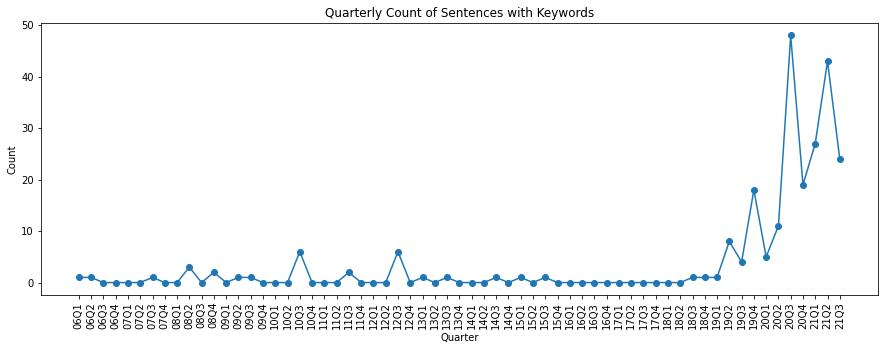

In [24]:
# plot count of sentences with keywords 
plt.figure(figsize=(15, 5))  # Set the figure size
plt.plot(final['quarter'],final['count'], marker='o')  # Plot line graph with markers
plt.title('Quarterly Count of Sentences with Keywords')  # Add a title
plt.xlabel('Quarter')  # Label the x-axis
plt.ylabel('Count')  # Label the y-axis
plt.grid(False)  # Optional: add a grid for easier readability
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.show()  # Display the plot

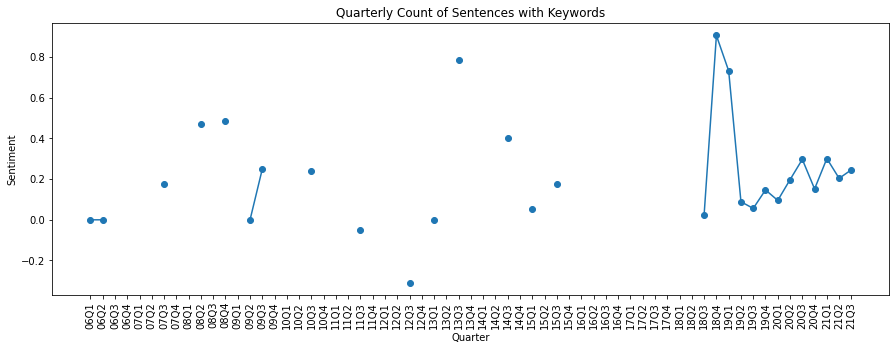

In [25]:
# plot average sentiment 
plt.figure(figsize=(15, 5))  # Set the figure size
plt.plot(final['quarter'],final['compound'], marker='o')  # Plot line graph with markers
plt.title('Quarterly Count of Sentences with Keywords')  # Add a title
plt.xlabel('Quarter')  # Label the x-axis
plt.ylabel('Sentiment')  # Label the y-axis
plt.grid(False)  # Optional: add a grid for easier readability
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.show()  # Display the plot